# A2: Unsupervised Analysis Project

Juan Pablo Peña <br>
Hult International Business School <br>
Date: April 6th, 2022

# Introduction

<p style='text-align: justify;'> The purpose of this assignment is to conduct principal component analysis on the Apprentice Chef, Inc. dataset and interpret its results. First a dataset exploration will be done to understand the general information about each feature, including types and the number of non-missing values. Second, a subset of the continuous X-variables (excluding revenue) will be created. Third, the data will be standardized using StandardScaler() and the feature names from the original dataset will be reattached.
In the fourth part principal component analysis (PCA) will be run and its resulting factor loadings will be presented, rounded to two decimal places. Next, a scree plot will be developed to determine the number of principal components to retain. Then, PCA will be run again, limiting the number of components based on the scree plot. Its resulting factor loadings will be presented, rounded to two decimal places. Finally an interpretation of the results will be done.</p>

# Part I: Fundamental Dataset Exploration

In [2]:
# importing libraries

import pandas as pd  # data science essentials
import numpy as np # arithmetic calculations
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca

# specifying file name
file = './__datasets/Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(io = file)


1.1) Display the general statistics of each feature.

In [3]:
# statistics description
apprentice.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,...,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,...,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,...,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,...,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


1.2) Display the first rows of each feature to get a feel for the data.

In [4]:
# displaying the first rows of the DataFrame
apprentice.head(n = 10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,...,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,...,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,...,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,...,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,...,0,2,1,0,84.8,1,1,3,14,147


1.3) Display general information about each feature, including types and the number of non-missing values.

In [5]:
# Information about each feature
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

1.4) Sum of missing values per feature.

In [6]:
# taking the apprentice dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

apprentice.isnull().sum(axis=0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

From the review of missing values, it is possible to observe FAMILY_NAME is the only variable of the data set with missing values. In order to select the best strategy to impute them, it might be a good idea to create a frequency table and select the most frequent family name as imputation value.

In [7]:
# value counts of family name
apprentice['FAMILY_NAME'].value_counts()

Frey            79
Stark           32
Lannister       29
Tyrell          28
Targaryen       24
                ..
Dance-for-Me     1
Delp             1
Eldiss           1
Erreck           1
Turnip           1
Name: FAMILY_NAME, Length: 1070, dtype: int64

In [8]:
# imputing missing values with the Frey
fill = 'Frey'

# FAMILY_NAME
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(fill)

In [9]:
# making sure all missing values have been taken care of
apprentice.isnull().any().any()

False

In [10]:
# value counts of family name
apprentice['FAMILY_NAME'].value_counts()

Frey            126
Stark            32
Lannister        29
Tyrell           28
Targaryen        24
               ... 
Dance-for-Me      1
Delp              1
Eldiss            1
Erreck            1
Turnip            1
Name: FAMILY_NAME, Length: 1070, dtype: int64

From the code above, it is possible to observe that the 47 null values of the FAMILY_NAME variable have been cleared and filled with 'Frey' instead.

# Part II: X-variables

In order to declare the x-variables that will serve as basis for the analysis, it is necessary to build histograms of all the dataset variables. The purpose is to analyze each variable distribution and decide which of them are continuous.

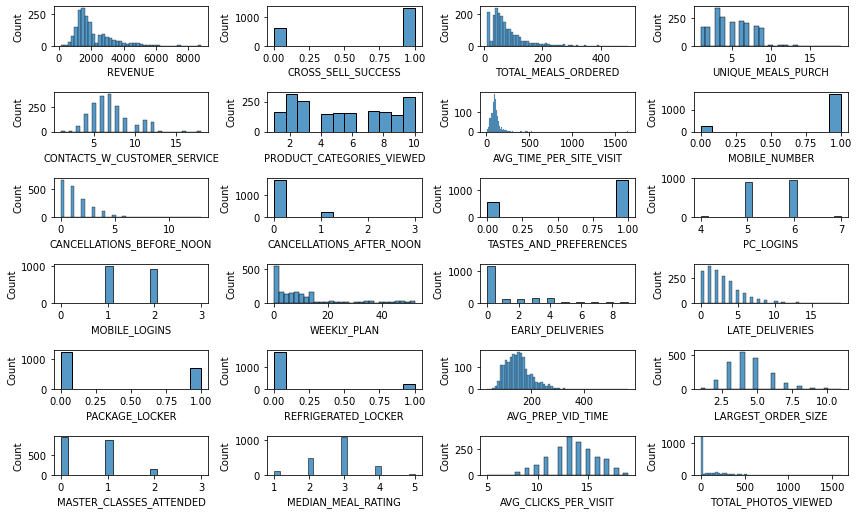

In [11]:
#removing names data
apprentice_x = apprentice.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in apprentice_x:

    # condition to break
    if count == 28:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(7, 4, count)
    sns.histplot(x = apprentice_x[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()

Histogram in deeper view

<AxesSubplot:xlabel='TOTAL_PHOTOS_VIEWED', ylabel='Count'>

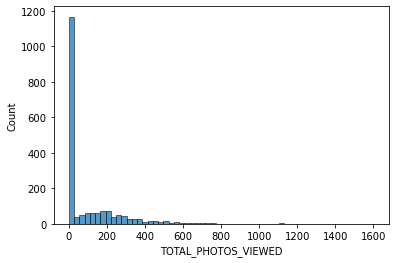

In [12]:
# histogram in deeper view
sns.histplot(x = apprentice_x['TOTAL_PHOTOS_VIEWED'],)

In [13]:
# declaring set of x-variables
x_variables = [ 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
               'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_BEFORE_NOON',
               'CANCELLATIONS_AFTER_NOON', 'WEEKLY_PLAN','EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                 'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
               'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

# Part III: Standardization

In [14]:
########################################
# unsupervised_scaler
########################################


def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [15]:
#removing names data
apprentice_df = apprentice.loc[:,x_variables]
# scaling (normalizing) variables 
apprentice_scaled = scaler(df = apprentice_df)
# checking results
apprentice_scaled.head(n=5)


,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,-1.096546,0.437758,2.199609,1.516860,-0.827983,1.029555,1.930020,-0.834935,-0.641123,-0.353771,-2.369937,-2.218665,-0.941742,-2.373244,1.496513,-0.588137
1,0.223632,-0.761507,0.445690,0.859661,-0.950725,-0.906831,-0.384101,0.049381,-0.641123,-0.353771,-1.330177,-2.218665,-0.941742,0.271092,-0.217815,0.351258
2,-1.078461,0.837513,1.761129,-0.126138,-1.280926,1.029555,-0.384101,-0.761242,-0.641123,-0.718217,-1.771164,-2.218665,-0.941742,-1.051076,1.067931,-0.588137
3,-1.114630,0.437758,1.761129,-0.126138,-0.154104,0.384093,-0.384101,0.196767,-0.641123,0.010675,-2.159557,-2.218665,-0.941742,-1.051076,0.210767,-0.588137
4,-0.499753,1.237268,-0.431269,1.516860,-0.950244,-0.906831,-0.384101,-0.466470,-0.641123,1.832904,-1.330177,-2.218665,0.616617,0.271092,-0.646397,0.544663


In [16]:
#reattaching dropped columns
apprentice = pd.concat([apprentice_scaled, apprentice.loc[:,['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME']]], axis=1)
#checking results
apprentice.head(n=5)

,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,NAME,EMAIL,FIRST_NAME,FAMILY_NAME
0,-1.096546,0.437758,2.199609,1.516860,-0.827983,1.029555,1.930020,-0.834935,-0.641123,-0.353771,-2.369937,-2.218665,-0.941742,-2.373244,1.496513,-0.588137,Saathos,saathos@unitedhealth.com,Saathos,Saathos
1,0.223632,-0.761507,0.445690,0.859661,-0.950725,-0.906831,-0.384101,0.049381,-0.641123,-0.353771,-1.330177,-2.218665,-0.941742,0.271092,-0.217815,0.351258,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey
2,-1.078461,0.837513,1.761129,-0.126138,-1.280926,1.029555,-0.384101,-0.761242,-0.641123,-0.718217,-1.771164,-2.218665,-0.941742,-1.051076,1.067931,-0.588137,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway
3,-1.114630,0.437758,1.761129,-0.126138,-0.154104,0.384093,-0.384101,0.196767,-0.641123,0.010675,-2.159557,-2.218665,-0.941742,-1.051076,0.210767,-0.588137,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling
4,-0.499753,1.237268,-0.431269,1.516860,-0.950244,-0.906831,-0.384101,-0.466470,-0.641123,1.832904,-1.330177,-2.218665,0.616617,0.271092,-0.646397,0.544663,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge


In [17]:
# checking pre- and post-scaling variance
print(np.var(apprentice_df), '\n\n')
print(np.var(apprentice_scaled))

TOTAL_MEALS_ORDERED             3057.599946
UNIQUE_MEALS_PURCH                 6.257663
CONTACTS_W_CUSTOMER_SERVICE        5.201168
PRODUCT_CATEGORIES_VIEWED          9.261178
AVG_TIME_PER_SITE_VISIT         3884.497383
CANCELLATIONS_BEFORE_NOON          2.400263
CANCELLATIONS_AFTER_NOON           0.186736
WEEKLY_PLAN                      184.139876
EARLY_DELIVERIES                   5.373137
LATE_DELIVERIES                    7.528947
AVG_PREP_VID_TIME               2443.767133
LARGEST_ORDER_SIZE                 2.400232
MASTER_CLASSES_ATTENDED            0.411780
MEDIAN_MEAL_RATING                 0.572040
AVG_CLICKS_PER_VISIT               5.444177
TOTAL_PHOTOS_VIEWED            32749.275410
dtype: float64 


TOTAL_MEALS_ORDERED            1.0
UNIQUE_MEALS_PURCH             1.0
CONTACTS_W_CUSTOMER_SERVICE    1.0
PRODUCT_CATEGORIES_VIEWED      1.0
AVG_TIME_PER_SITE_VISIT        1.0
CANCELLATIONS_BEFORE_NOON      1.0
CANCELLATIONS_AFTER_NOON       1.0
WEEKLY_PLAN                    1.

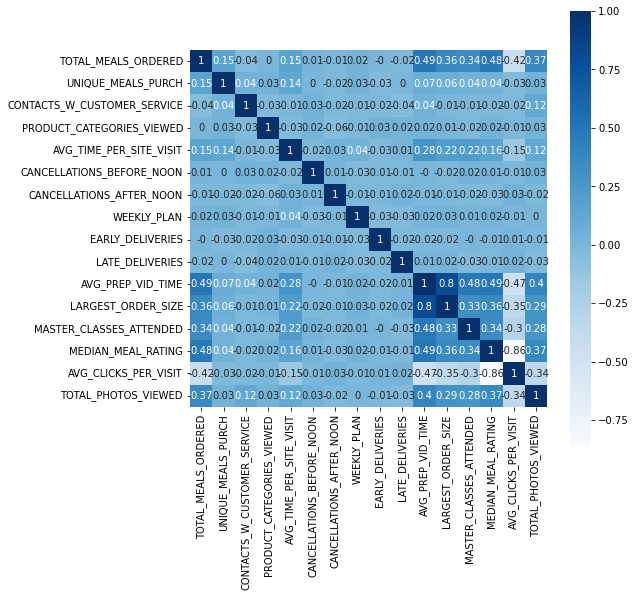

In [18]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = apprentice_scaled.corr(method = 'pearson').round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

Notice that only a few (Pearson) correlations have an absolute value above 0.50. This makes the dataset a good candidate for PCA. As such, we may be able to explain a high degree of variance with a small number of principal components.

# Part IV: PCA

In [19]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
apprentice_pca = pca.fit_transform(apprentice_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", apprentice_scaled.shape)
print("PCA shape     :", apprentice_pca.shape)

Original shape: (1946, 16)
PCA shape     : (1946, 16)


In [20]:
# PCA Data Frame per customer
pd.DataFrame(apprentice_pca.round(decimals=2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-4.38,-0.27,2.16,0.53,1.80,0.44,0.57,-0.20,1.62,-1.64,0.39,0.66,-0.69,0.44,-0.24,0.55
1,-1.51,-1.83,0.41,-0.20,-1.11,0.84,-0.59,-0.89,0.34,-0.93,0.45,1.08,0.19,0.62,0.35,-0.03
2,-3.43,-0.95,2.54,0.33,0.53,0.56,0.23,-0.59,-0.42,-0.23,-0.15,0.13,-0.53,-0.01,0.26,-0.10
3,-3.09,-0.40,2.04,0.26,-0.21,0.92,-0.19,-0.93,0.19,0.34,0.96,0.31,-0.32,0.11,-0.13,0.50
4,-0.96,-0.82,-0.31,-1.58,0.29,2.08,-0.43,-1.82,0.25,-0.39,0.14,1.81,-1.17,-0.94,0.25,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3.10,1.53,-0.02,-0.85,0.46,-0.63,-1.03,0.27,-0.61,-0.87,-0.64,-1.54,-1.74,-0.65,-1.53,0.50
1942,5.54,1.36,-1.35,3.21,0.80,-0.10,0.56,0.17,2.09,-1.58,-1.62,-0.62,0.95,0.95,-0.66,-0.00
1943,3.28,-0.39,-0.75,0.40,1.26,-0.68,-2.07,0.63,0.77,1.15,-0.51,-1.55,2.20,-1.19,-0.58,-0.80
1944,9.37,5.65,0.54,-0.76,2.37,-3.58,-2.24,2.28,-0.22,-1.00,5.22,0.98,1.82,-1.07,3.20,0.76


Code to loop over each principal component, printing its component number as well as its explained variance ratio.

In [21]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(decimals =3)}")

PC 1: 0.231
PC 2: 0.074
PC 3: 0.069
PC 4: 0.067
PC 5: 0.065
PC 6: 0.064
PC 7: 0.061
PC 8: 0.06
PC 9: 0.059
PC 10: 0.057
PC 11: 0.051
PC 12: 0.047
PC 13: 0.042
PC 14: 0.034
PC 15: 0.01
PC 16: 0.009


In [22]:
# component number counter
component_number = 0
#cumulative variance counter
cumulative_variance = 0
# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    cumulative_variance += variance
    print(f"PC {component_number}: {cumulative_variance.round(decimals =3)}")

PC 1: 0.231
PC 2: 0.305
PC 3: 0.374
PC 4: 0.441
PC 5: 0.506
PC 6: 0.57
PC 7: 0.631
PC 8: 0.691
PC 9: 0.75
PC 10: 0.807
PC 11: 0.858
PC 12: 0.905
PC 13: 0.947
PC 14: 0.981
PC 15: 0.991
PC 16: 1.0


In [23]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum(axis = 0))

0.9999999999999999


## Screeplot

In [24]:
########################################
# scree_plot
########################################

def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_clients_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


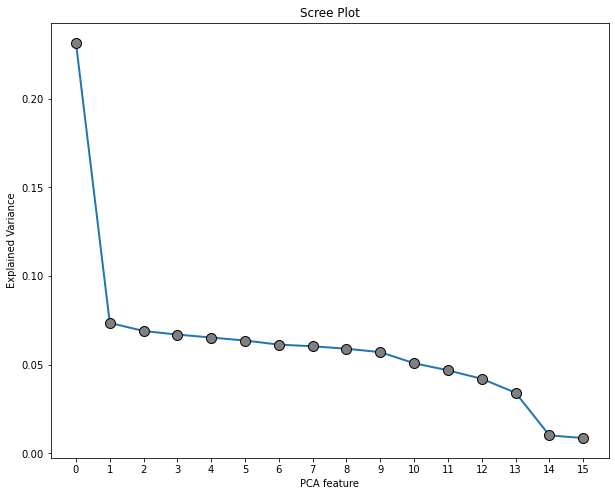

In [25]:
# calling the scree_plot function
scree_plot(pca_object = pca,
          export = True)

In this case, one would assume two PCs is a reasonable number based on the elbow in the scree plot. However, the cumulative explained variance ratio is not greater than or equal to 0.80. The explained variance of the first ten components adds up 0.807. Therefore retaining ten components is a reasonable number.   

## Factor loadings

In [27]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(apprentice_scaled.columns)


# checking the result
print(factor_loadings_df)

# saving to Excel
# factor_loadings_df.to_excel(excel_writer = 'chef_factor_loadings.xlsx',index        = False)

                               0     1     2     3     4     5     6     7   \
TOTAL_MEALS_ORDERED          0.36 -0.04  0.00 -0.05 -0.03  0.06  0.15 -0.08   
UNIQUE_MEALS_PURCH           0.07  0.40  0.37 -0.35  0.06  0.21  0.38 -0.42   
CONTACTS_W_CUSTOMER_SERVICE  0.01 -0.07  0.68  0.19  0.18 -0.20 -0.37 -0.23   
PRODUCT_CATEGORIES_VIEWED    0.01 -0.19 -0.01 -0.68  0.19  0.09 -0.02  0.21   
AVG_TIME_PER_SITE_VISIT      0.18  0.52  0.02 -0.04  0.04 -0.07  0.18 -0.03   
CANCELLATIONS_BEFORE_NOON    0.01 -0.20  0.31  0.10  0.43  0.28  0.40  0.54   
CANCELLATIONS_AFTER_NOON    -0.02  0.19 -0.23  0.53  0.20  0.05  0.36 -0.07   
WEEKLY_PLAN                  0.02  0.22  0.11 -0.09 -0.64  0.14 -0.03  0.31   
EARLY_DELIVERIES            -0.01 -0.23 -0.20 -0.23  0.10 -0.64  0.35 -0.22   
LATE_DELIVERIES             -0.01  0.16 -0.36 -0.11  0.43  0.40 -0.40 -0.24   
AVG_PREP_VID_TIME            0.44  0.16 -0.05 -0.01  0.12 -0.17 -0.15  0.18   
LARGEST_ORDER_SIZE           0.37  0.23 -0.10 -0.04 

## Factor loadings with the labeled components  to retain

In [28]:
# naming each principal component
factor_loadings_df.columns = ['Quantity Clients',   # prefer to buy meals at a wholesale scale and get weekly plan discount promotions, they don´t do too much clicks per site or mobile site visit. They prefer to buy for quantity rather than for quality
                              'Quality Clients',    # prefer unique meals, spend a considerable time on the site, their median meal rating score is low, and they don´t see categories in great detail. They prefer to buy for quality rather than for quantity.
                              'Complainers',        # contact customer service most times.
                              'Afternoon cancellers', # most of the times cancel in the afternoon
                              'Before noon cancellers', # most of the times cancel before noon.
                              'Late receivers', # receive late deliveries most of the times
                              'Unique meals clients', # prefer unique meals
                              'Unique meals avoiders', # avoids unique meals
                              'Master classes avoiders', # avoids master classes
                              'Product categories avoiders', #avoids viewing product categories 
                              '10',
                              '11',
                              '12',
                              '13',
                              '14',
                              '15',
                             
                             ] 


# checking the result
factor_loadings_df


,Quantity Clients,Quality Clients,Complainers,Afternoon cancellers,Before noon cancellers,Late receivers,Unique meals clients,Unique meals avoiders,Master classes avoiders,Product categories avoiders,10,11,12,13,14,15
TOTAL_MEALS_ORDERED,0.36,-0.04,0.00,-0.05,-0.03,0.06,0.15,-0.08,-0.02,-0.02,-0.31,0.24,0.08,0.81,-0.09,0.05
UNIQUE_MEALS_PURCH,0.07,0.40,0.37,-0.35,0.06,0.21,0.38,-0.42,-0.05,-0.02,-0.33,-0.10,-0.10,-0.25,0.02,-0.00
CONTACTS_W_CUSTOMER_SERVICE,0.01,-0.07,0.68,0.19,0.18,-0.20,-0.37,-0.23,0.30,0.05,0.17,-0.15,-0.19,0.20,-0.05,-0.03
PRODUCT_CATEGORIES_VIEWED,0.01,-0.19,-0.01,-0.68,0.19,0.09,-0.02,0.21,0.37,-0.46,0.22,0.05,-0.09,0.05,-0.02,0.01
AVG_TIME_PER_SITE_VISIT,0.18,0.52,0.02,-0.04,0.04,-0.07,0.18,-0.03,-0.10,0.08,0.73,0.09,0.28,0.13,-0.04,0.01
CANCELLATIONS_BEFORE_NOON,0.01,-0.20,0.31,0.10,0.43,0.28,0.40,0.54,-0.03,0.36,0.01,-0.08,0.05,0.00,0.00,-0.00
CANCELLATIONS_AFTER_NOON,-0.02,0.19,-0.23,0.53,0.20,0.05,0.36,-0.07,0.57,-0.36,-0.04,-0.00,-0.08,-0.03,-0.00,-0.00
WEEKLY_PLAN,0.02,0.22,0.11,-0.09,-0.64,0.14,-0.03,0.31,0.53,0.34,-0.07,0.02,-0.01,-0.01,0.01,0.01
EARLY_DELIVERIES,-0.01,-0.23,-0.20,-0.23,0.10,-0.64,0.35,-0.22,0.26,0.43,-0.01,-0.06,0.02,-0.02,0.00,0.00
LATE_DELIVERIES,-0.01,0.16,-0.36,-0.11,0.43,0.40,-0.40,-0.24,0.21,0.46,-0.03,0.11,-0.05,0.02,-0.00,0.01


In [29]:
# converting into a DataFrame 
apprentice_pca = pd.DataFrame(apprentice_pca)


# renaming columns
apprentice_pca.columns = factor_loadings_df.columns


# checking results
apprentice_pca.round(decimals=2)

,Quantity Clients,Quality Clients,Complainers,Afternoon cancellers,Before noon cancellers,Late receivers,Unique meals clients,Unique meals avoiders,Master classes avoiders,Product categories avoiders,10,11,12,13,14,15
0,-4.38,-0.27,2.16,0.53,1.80,0.44,0.57,-0.20,1.62,-1.64,0.39,0.66,-0.69,0.44,-0.24,0.55
1,-1.51,-1.83,0.41,-0.20,-1.11,0.84,-0.59,-0.89,0.34,-0.93,0.45,1.08,0.19,0.62,0.35,-0.03
2,-3.43,-0.95,2.54,0.33,0.53,0.56,0.23,-0.59,-0.42,-0.23,-0.15,0.13,-0.53,-0.01,0.26,-0.10
3,-3.09,-0.40,2.04,0.26,-0.21,0.92,-0.19,-0.93,0.19,0.34,0.96,0.31,-0.32,0.11,-0.13,0.50
4,-0.96,-0.82,-0.31,-1.58,0.29,2.08,-0.43,-1.82,0.25,-0.39,0.14,1.81,-1.17,-0.94,0.25,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3.10,1.53,-0.02,-0.85,0.46,-0.63,-1.03,0.27,-0.61,-0.87,-0.64,-1.54,-1.74,-0.65,-1.53,0.50
1942,5.54,1.36,-1.35,3.21,0.80,-0.10,0.56,0.17,2.09,-1.58,-1.62,-0.62,0.95,0.95,-0.66,-0.00
1943,3.28,-0.39,-0.75,0.40,1.26,-0.68,-2.07,0.63,0.77,1.15,-0.51,-1.55,2.20,-1.19,-0.58,-0.80
1944,9.37,5.65,0.54,-0.76,2.37,-3.58,-2.24,2.28,-0.22,-1.00,5.22,0.98,1.82,-1.07,3.20,0.76


In [34]:
# exploring customers in the Quantity Clients persona
apprentice_pca['Quantity Clients'][apprentice_pca['Quantity Clients'] > 1.0]

163     1.498644
211     1.360171
223     1.973414
232     1.395449
234     1.098407
          ...   
1941    3.101656
1942    5.544789
1943    3.276319
1944    9.369488
1945    3.921536
Name: Quantity Clients, Length: 487, dtype: float64

In [35]:
# exploring customers in the Quality Clients persona
apprentice_pca['Quality Clients'][apprentice_pca['Quality Clients'] > 1.0]

18      1.218384
22      1.156706
34      1.346751
47      1.166884
83      1.552577
          ...   
1939    4.065649
1940    1.701695
1941    1.528058
1942    1.362160
1944    5.647702
Name: Quality Clients, Length: 302, dtype: float64

In [31]:
# exploring customers in the Complainers persona
apprentice_pca['Complainers'][apprentice_pca['Complainers'] > 1.0]

0       2.159710
2       2.544282
3       2.035647
7       1.733156
8       1.791817
          ...   
1907    1.031363
1914    1.163922
1920    1.200819
1931    1.012907
1934    1.097312
Name: Complainers, Length: 338, dtype: float64

In [32]:
# exploring customers in the Afternoon cancellers persona
apprentice_pca['Afternoon cancellers'][apprentice_pca['Afternoon cancellers'] > 1.0]

5       1.857230
7       1.302723
11      1.046041
21      1.530746
23      1.422426
          ...   
1928    1.239560
1929    1.058420
1932    1.309766
1934    2.321653
1942    3.207198
Name: Afternoon cancellers, Length: 303, dtype: float64

In [33]:
# exploring customers in the Before noon cancellers persona
apprentice_pca['Before noon cancellers'][apprentice_pca['Before noon cancellers'] > 1.0]

0       1.795313
28      1.588889
33      1.713419
39      1.230221
49      1.878105
          ...   
1934    2.961497
1935    1.283460
1943    1.255165
1944    2.365606
1945    1.868212
Name: Before noon cancellers, Length: 293, dtype: float64

In [34]:
# exploring customers in the Late receivers persona
apprentice_pca['Late receivers'][apprentice_pca['Late receivers'] > 1.0]

4       2.075064
6       1.379970
11      1.312096
15      1.233255
19      1.871291
          ...   
1824    1.200377
1842    1.145308
1886    1.642329
1889    2.695346
1905    2.456153
Name: Late receivers, Length: 276, dtype: float64

In [35]:
# exploring customers in the Unique meals clients persona
apprentice_pca['Unique meals clients'][apprentice_pca['Unique meals clients'] > 1.0]

6       1.016744
18      1.115141
19      1.157447
20      1.241804
23      1.357971
          ...   
1848    1.885324
1871    2.111599
1931    1.288401
1932    1.919868
1937    1.058203
Name: Unique meals clients, Length: 298, dtype: float64

In [36]:
# exploring customers in the Unique meals avoiders persona
apprentice_pca['Unique meals avoiders'][apprentice_pca['Unique meals avoiders'] > 1.0]

28      1.775548
39      1.110851
40      1.194189
41      1.078030
73      2.024296
          ...   
1934    2.403807
1937    1.045129
1940    2.099524
1944    2.279559
1945    2.138877
Name: Unique meals avoiders, Length: 300, dtype: float64

In [37]:
# exploring customers in the Master classes avoiders persona
apprentice_pca['Master classes avoiders'][apprentice_pca['Master classes avoiders'] > 1.0]

0       1.620858
8       1.875120
12      1.580045
13      1.833245
15      1.588930
          ...   
1924    1.470971
1925    2.579656
1926    1.081147
1931    2.075988
1942    2.090156
Name: Master classes avoiders, Length: 296, dtype: float64

In [38]:
# exploring customers in the Product categories avoiders persona
apprentice_pca['Product categories avoiders'][apprentice_pca['Product categories avoiders'] > 1.0]

5       1.297309
6       1.298147
11      1.428705
16      1.400136
27      1.151241
          ...   
1910    2.238872
1921    1.291938
1922    1.035398
1936    1.544582
1943    1.146645
Name: Product categories avoiders, Length: 282, dtype: float64

# Part V: Results Interpretation

<p style='text-align: justify;'> From the Principal Component Analysis, it is possible to observe ten client segments: 

One segment is addressed to clients who prefer to buy meals at a wholesale scale and get weekly plan discount promotions, as the factor loadings display coefficients of 0.36, 0.37 and 0.02 for the variables "total meals ordered", "largest order size" and "weekly plan" respectively. From the -0.39 obtained in the factor loading table for the variable "Average Clicks per Visit", it can be inferred that they don´t do too much clicks per site or mobile site visit. Looking at the factor loadings in general, it is possible to conclude they prefer to buy for quantity rather than for quality. For this reason they can be labeled as "Quantity Clients". If we explore the quantity clients persona, it is possible to observe customers in the indexes 163, 211, 223, 232 and 234 on top of the list and 1941, 1942, 1943, 1944 an 1945 at the bottom of the list have coefficients above 1.0.

The second segment is addressed to clients who prefer unique meals, spend a considerable time on the site and their median meal rating is low, as the factor loadings display coefficients of 0.07, 0.52 and -0.31 for the variables "unique meals purch", "average time per site visit" and "median meal rating" respectively. In addition, they don´t see product categories in great detail , as the variable "product categories viewed" has a coefficient -0.19. Looking at the factor loadings in general, it is possible to conclude they prefer to buy for quality rather than for quantity. For this reason they can be labeled as "Quality Clients". If we explore the quality clients persona, it is possible to observe customers in the indexes 18, 22, 34, 47 and 83 on top of the list and 1939, 1940, 1941, 1942 an 1944 at the bottom of the list have coefficients above 1.0. 

The third segment is addressed to clients who contact customer service most of the times, as the coefficient is 0.68 for the variable "contacts with customer service". The coefficient of -0.36 in the variable "late deliveries" demonstrates this segment tend to receive orders on time. Looking at the factor loadings in general, it is possible to conclude they contact customer service a lot. For this reason they can be labeled as "Complainers". If we explore the complainers persona, the customers with indexes 0,2,3,7 and 8 on top of the list and 1907, 1914, 1920, 1931 and 1934 at the bottom have coefficients above 1.

The fourth segment is addressed to clients who often cancel in the afternoons, as the coefficient is 0.53 for the variable "cancellations after noon". The coefficient of -0.68 in the variable "product categories viewed" demonstrates they don´t like viewing too many product categories. Looking at the factor loadings in general, it is possible to conclude they often cancel in the afternoon. For this reason they can be labeled as "Afternoon cancellers". If we explore the afternoon cancellers persona, the indexes 5,7,11,21,23,1928,1929,1932,1934 and 1942 have coefficients above 1.

The fifth segment is addressed to clients who often cancel before noons, as the coefficient is 0.43 for the variable "cancellations before noons". The coefficient of -0.64 in the variable "weekly plan" demostrates they don´t make use of the weekly plan promotions. Looking at the factor loadings in general, it is possible to conclude they often cancel before noon. For this reason they can be labeled as "Before noon cancellers". If we explore the before noon cancellers persona, the indexes 0,28,33,39,49,1934,1935,1943,1944,1945 have coefficients above 1.

The sixth segment is addressed to clients who record a high number of late deliveries, as the coefficient is 0.4 for the variable "late deliveries". The coefficient of -0.64 in the variable "early deliveries" demonstrates they rarely receive orders on time. Looking at the factor loadings in general, it is possible to conclude they often receive their meals late. For this reason they can be labeled as "Late receivers". If we explore the late receivers persona, the indexes 4,6,11,15,19,1824,1842,1886,1889,1905 have coefficients above 1.

The seventh segment is addressed to clients who often order unique meals, as the coefficient is 0.38 for the variable "unique meals purch". The coefficient of -0.4 in the variable "late deliveries" demonstrates they rarely receive delayed meals. Looking at the factor loadings in general, it is possible to conclude they often order unique meals. For this reason they can be labeled as "Unique meals clients". If we explore the unique meals clients persona, the indexes 6,18,19,20,23,1848,1871,1931,1932,1937 have coefficients above 1.

The eighth segment is addressed to clients who avoid unique meals, as the coefficient is -0.42 for the variable "unique meals purch". The coefficient of 0.54 in the variable "cancellations before noon" demonstrates they tend to cancel before noon. Looking at the factor loadings in general, it is possible to conclude they avoid ordering unique meals. For this reason they can be labeled as "Unique meals avoiders". If we explore the unique meals avoiders persona, the indexes 28,39,40,41,73,1934,1937,1940,1944,1945 have coefficients above 1.

The ninth segment is addressed to clients who avoid master classes, as the coefficient is -0.13 for the variable "master classess attended". The coefficient of 0.57 in the variable "cancellations after noon" demonstrates they tend to cancel after noon. Looking at the factor loadings in general, it is possible to conclude they rarely avoid master classes. For this reason they can be labeled as "Master classes avoiders". If we explore the master classes avoiders persona, the indexes 0,8,12,13,15,1924,1925,1926,1931,1942 have coefficients above 1.

The tenth segment is addressed to clients who avoid viewing product categories, as the coefficient is -0.46 for the variable "product categories viewed". The coefficient of 0.46 in the variable "late deliveries" demonstrates they mostly receive delayed meals. Looking at the factor loadings in general, it is possible to conclude they rarely view product categories. For this reason they can be labeled as "Product categories viewed avoiders". If we explore the product categories viewed avoiders persona, the indexes 5,6,11,16,27,1910,1921,1922,1936,1943 have coefficients above 1.






</p>
                            

# Word Count

In [41]:
import json

with open('Peña_Juan_A2_Unsupervised Analysis Project.ipynb') as json_file:
    data = json.load(json_file)
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

1493
